### WeatherPy 

#### Creating Latitude and Longitude Combinations

In [1]:
# Let's apply our new knowledge to this project. 
# Import the Pandas, Matplotlib, and NumPy dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
   

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)
coordinates


In [3]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:    
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)
# List for holding lat_lngs and cities
lat_longs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)
# Identify nearest city for each lat, lng combination
for lat_long in lat_longs:
   city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
   # If the city is unique, then add it to a our cities list
   if city not in cities:
       cities.append(city)
# Print the city count to confirm sufficient count
len(cities)



634

In [5]:
# Module 6.2.2

# We will need to do the following:

# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.


In [6]:
# Import your Requests Library and the weather_api_key.
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
#(we worked on this URL and the API key in API_practice.ipynb file where @@@@@ API @@@@@ has been typed)
# Import the API key.
#from config import weather_api_key


# Import the datetime module from the datetime library.
from datetime import datetime
# import requests
# import time


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 13 | yellowknife
Processing Record 2 of Set 13 | hilo
Processing Record 3 of Set 13 | saurimo
Processing Record 4 of Set 13 | georgetown
Processing Record 5 of Set 13 | arraial do cabo
Processing Record 6 of Set 13 | saskylakh
Processing Record 7 of Set 13 | tsihombe
Processing Record 8 of Set 13 | kununurra
Processing Record 9 of Set 13 | nantucket
Processing Record 10 of Set 13 | huntingdon
Processing Record 11 of Set 13 | bluff
Processing Record 12 of Set 13 | cayenne
Processing Record 13 of Set 13 | lorengau
Processing Record 14 of Set 13 | tahoua
Processing Record 15 of Set 13 | miedzyrzec podlaski
Processing Record 16 of Set 13 | belushya guba
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | barentsburg
Processing Record 19 of Set 13 | tuktoyaktuk
Processing Record 20 of Set 13 | paine
Processing Record 21 of Set 13 | lingdong
Processing Record 22 of Set 13 | deputatskiy
Processing Record 23 of Set 13 | tumannyy
Processing Record

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
### Let's add a try-except block to our code

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Create counters.
record_count = 1
set_count = 1

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 35 of Set 25 | yellowknife
Processing Record 36 of Set 25 | hilo
Processing Record 37 of Set 25 | saurimo
Processing Record 38 of Set 25 | georgetown
Processing Record 39 of Set 25 | arraial do cabo
Processing Record 40 of Set 25 | saskylakh
Processing Record 41 of Set 25 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 25 | kununurra
Processing Record 43 of Set 25 | nantucket
Processing Record 44 of Set 25 | huntingdon
Processing Record 45 of Set 25 | bluff
Processing Record 46 of Set 25 | cayenne
Processing Record 47 of Set 25 | lorengau
Processing Record 48 of Set 25 | tahoua
Processing Record 49 of Set 25 | miedzyrzec podlaski
Processing Record 50 of Set 25 | belushya guba
City not found. Skipping...
Processing Record 51 of Set 25 | albany
Processing Record 52 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 53 of Set 25 | tuktoyaktuk
Processing Record 54 of Set 25 | paine
Processing Record 55 of Set 25 | lingdong
Processing 

Processing Record 33 of Set 28 | belaya gora
Processing Record 34 of Set 28 | verkhoyansk
Processing Record 35 of Set 28 | pidhaytsi
Processing Record 36 of Set 28 | miri
Processing Record 37 of Set 28 | kavieng
Processing Record 38 of Set 28 | salalah
Processing Record 39 of Set 28 | hobart
Processing Record 40 of Set 28 | kerema
Processing Record 41 of Set 28 | lasa
Processing Record 42 of Set 28 | sechura
Processing Record 43 of Set 28 | kropotkin
Processing Record 44 of Set 28 | tawzar
City not found. Skipping...
Processing Record 45 of Set 28 | bell ville
Processing Record 46 of Set 28 | alihe
Processing Record 47 of Set 28 | dzhebariki-khaya
Processing Record 48 of Set 28 | ambositra
Processing Record 49 of Set 28 | saldanha
Processing Record 50 of Set 28 | yuzhno-kurilsk
Processing Record 1 of Set 29 | nayagarh
Processing Record 2 of Set 29 | geraldton
Processing Record 3 of Set 29 | sioux falls
Processing Record 4 of Set 29 | coquimbo
Processing Record 5 of Set 29 | nizwa
Proce

Processing Record 22 of Set 32 | pahrump
Processing Record 23 of Set 32 | sungairaya
Processing Record 24 of Set 32 | coihaique
Processing Record 25 of Set 32 | henties bay
Processing Record 26 of Set 32 | kruisfontein
Processing Record 27 of Set 32 | mantua
Processing Record 28 of Set 32 | klaksvik
Processing Record 29 of Set 32 | homer
Processing Record 30 of Set 32 | jacupiranga
Processing Record 31 of Set 32 | port lincoln
Processing Record 32 of Set 32 | tacuarembo
Processing Record 33 of Set 32 | khandagayty
Processing Record 34 of Set 32 | severo-kurilsk
Processing Record 35 of Set 32 | albanel
Processing Record 36 of Set 32 | donskoye
Processing Record 37 of Set 32 | krasnotorka
Processing Record 38 of Set 32 | opuwo
Processing Record 39 of Set 32 | port-gentil
Processing Record 40 of Set 32 | dabuleni
Processing Record 41 of Set 32 | rongcheng
Processing Record 42 of Set 32 | sheregesh
Processing Record 43 of Set 32 | bay roberts
Processing Record 44 of Set 32 | kulhudhuffushi

Processing Record 11 of Set 36 | acarau
Processing Record 12 of Set 36 | creston
Processing Record 13 of Set 36 | kwinana
Processing Record 14 of Set 36 | sorong
Processing Record 15 of Set 36 | arona
Processing Record 16 of Set 36 | maceio
Processing Record 17 of Set 36 | makakilo city
Processing Record 18 of Set 36 | klyuchi
Processing Record 19 of Set 36 | anadyr
Processing Record 20 of Set 36 | egvekinot
Processing Record 21 of Set 36 | portales
Processing Record 22 of Set 36 | hit
Processing Record 23 of Set 36 | kapuskasing
Processing Record 24 of Set 36 | urubicha
Processing Record 25 of Set 36 | hashtrud
Processing Record 26 of Set 36 | kasongo
Processing Record 27 of Set 36 | parainen
Processing Record 28 of Set 36 | paradwip
City not found. Skipping...
Processing Record 29 of Set 36 | taltal
Processing Record 30 of Set 36 | jinchang
Processing Record 31 of Set 36 | lakes entrance
Processing Record 32 of Set 36 | guiyang
Processing Record 33 of Set 36 | musoma
Processing Recor

In [61]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,55.92,82,75,1.01,CA,2021-06-04 21:17:03
1,Hilo,19.7297,-155.0900,83.93,58,20,8.05,US,2021-06-04 21:21:29
2,Saurimo,-9.6608,20.3916,64.08,48,76,5.53,AO,2021-06-04 21:21:29
3,Georgetown,5.4112,100.3354,81.90,86,20,4.61,MY,2021-06-04 21:18:05
4,Arraial Do Cabo,-22.9661,-42.0278,73.36,94,0,11.50,BR,2021-06-04 21:21:29
5,Saskylakh,71.9167,114.0833,33.98,86,100,8.57,RU,2021-06-04 21:21:30
6,Kununurra,-15.7667,128.7333,75.18,31,90,12.66,AU,2021-06-04 21:18:04
7,Nantucket,41.2835,-70.0995,64.02,100,90,10.36,US,2021-06-04 21:20:16
8,Huntingdon,52.3305,-0.1865,58.78,91,100,1.01,GB,2021-06-04 21:21:30
9,Bluff,-46.6000,168.3333,49.80,79,100,14.23,NZ,2021-06-04 21:21:31


In [62]:
# Reorder the columns in the order you want them to appear.

new_column_order = ["City", "Country", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]

# Assign a new or the same DataFrame the new column order.

reordered_df = city_data_df[new_column_order]

city_data_df = reordered_df


### Created this the output file (CSV) to later call the CSV file instead of generating 
###the list of cities each time
output_data_file = "weather_data/cities.csv"
### Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


city_data_df.head(10)


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Yellowknife,CA,62.4560,-114.3525,55.92,82,75,1.01,2021-06-04 21:17:03
1,Hilo,US,19.7297,-155.0900,83.93,58,20,8.05,2021-06-04 21:21:29
2,Saurimo,AO,-9.6608,20.3916,64.08,48,76,5.53,2021-06-04 21:21:29
3,Georgetown,MY,5.4112,100.3354,81.90,86,20,4.61,2021-06-04 21:18:05
4,Arraial Do Cabo,BR,-22.9661,-42.0278,73.36,94,0,11.50,2021-06-04 21:21:29
5,Saskylakh,RU,71.9167,114.0833,33.98,86,100,8.57,2021-06-04 21:21:30
6,Kununurra,AU,-15.7667,128.7333,75.18,31,90,12.66,2021-06-04 21:18:04
7,Nantucket,US,41.2835,-70.0995,64.02,100,90,10.36,2021-06-04 21:20:16
8,Huntingdon,GB,52.3305,-0.1865,58.78,91,100,1.01,2021-06-04 21:21:30
9,Bluff,NZ,-46.6000,168.3333,49.80,79,100,14.23,2021-06-04 21:21:31


In [63]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

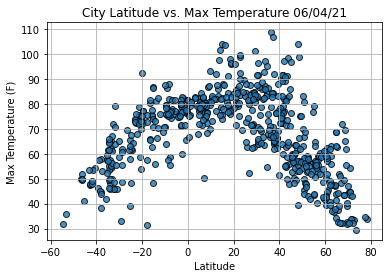

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

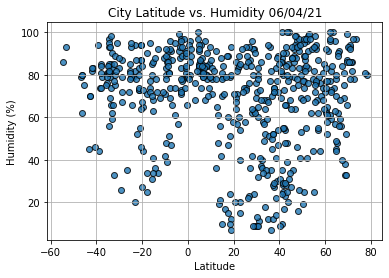

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

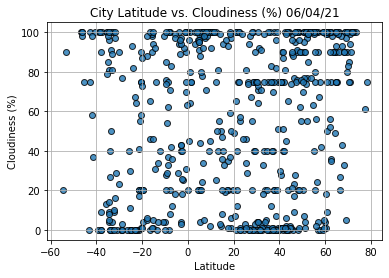

In [18]:
# 6.3.3 Plot Latitude vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

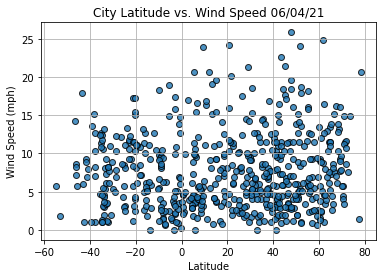

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

#### Create a Linear Regression Function

In [20]:
# To create a Linear Regression Function:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City          Miedzyrzec Podlaski
Country                        PL
Lat                       51.9864
Lng                       22.7825
Max Temp                    59.05
Humidity                       69
Cloudiness                     97
Wind Speed                   0.96
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
583    False
584     True
585    False
586     True
587     True
Name: Lat, Length: 588, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,62.4560,-114.3525,55.92,82,75,1.01
1,Hilo,US,19.7297,-155.0900,83.93,58,20,8.05
3,Georgetown,MY,5.4112,100.3354,81.90,86,20,4.61
5,Saskylakh,RU,71.9167,114.0833,33.98,86,100,8.57
7,Nantucket,US,41.2835,-70.0995,64.02,100,90,10.36


In [47]:
# To create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

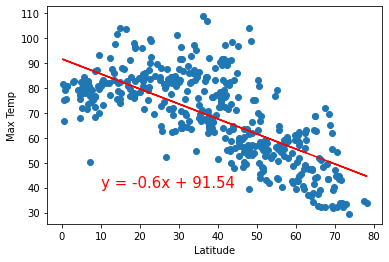

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

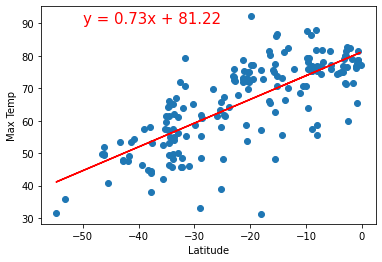

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

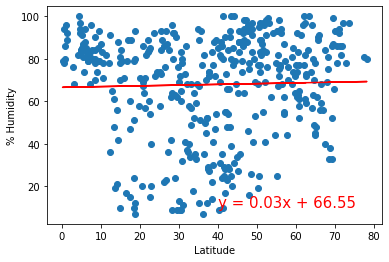

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

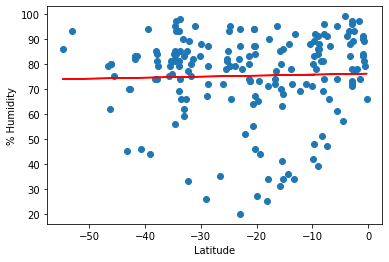

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,10))


##### Perform Linear Regression on the Percent Cloudiness for the Northern and Southern Hemisphere

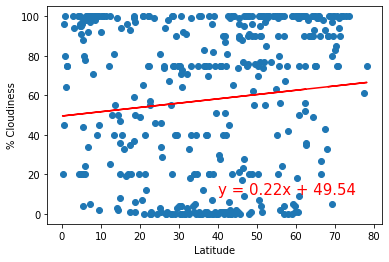

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

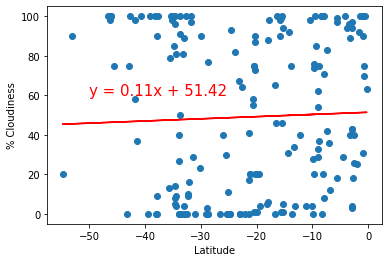

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

##### 6.4.5 Find the Correlation Between Latitude and Wind Speed

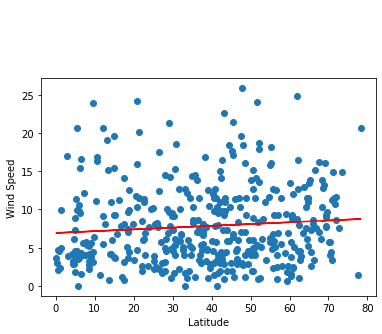

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

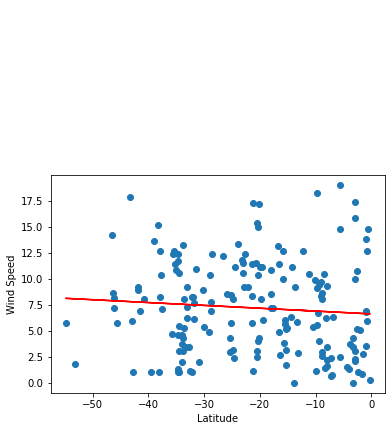

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))